<a href="https://colab.research.google.com/github/DiwakarBasnet/CIFAR10_Image_Classification_using_CNN_and_ANN/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [13]:
# reshape y_train from 2D array to 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

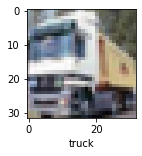

In [6]:
plot_sample(X_train, y_train, 1)

In [7]:
# normalizing values of train and test array
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# checking how does this work on ann model

# ann = models.Sequential([
#             layers.Flatten(input_shape=(32,32,3)),
#             layers.Dense(3000, activation='relu'),
#             layers.Dense(1000, activation='relu'),
#             layers.Dense(10, activation='sigmoid')
# ])

# ann.compile(optimizer='SGD',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])

# ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8165 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.6247 - accuracy: 0.4245
Epoch 3/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.5435 - accuracy: 0.4544
Epoch 4/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4842 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4354 - accuracy: 0.4941


In [17]:
# from sklearn.metrics import confusion_matrix, classification_report
# y_pred = ann.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report:\n",classification_report(y_test,y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58      1000
           1       0.46      0.80      0.58      1000
           2       0.46      0.17      0.25      1000
           3       0.39      0.27      0.32      1000
           4       0.43      0.44      0.43      1000
           5       0.53      0.25      0.34      1000
           6       0.40      0.74      0.52      1000
           7       0.43      0.70      0.53      1000
           8       0.69      0.53      0.60      1000
           9       0.65      0.35      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [8]:
# cnn = convolutional layers + dense layer from ann
# no need to specify input_shape in layers.Flatten because our cnn automatically detects
# no need for many dense neurons because most of the work is already done in cnn

cnn = models.Sequential([
            #cnn
            layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),   # filters=32 detects 32 different features from image
            layers.MaxPooling2D((2,2)),

            layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            
            #dense
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.4857 - accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1176 - accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9827 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9029 - accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8336 - accuracy: 0.7125
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7774 - accuracy: 0.7299
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7266 - accuracy: 0.7486
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6905 - accuracy: 0.7589
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6490 - accuracy: 0.7748
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [11]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9307 - accuracy: 0.6979


[0.9307183623313904, 0.6978999972343445]

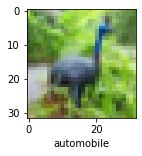

In [20]:
plot_sample(X_test, y_test, 6)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      1000
           1       0.82      0.81      0.82      1000
           2       0.71      0.47      0.57      1000
           3       0.50      0.54      0.52      1000
           4       0.56      0.77      0.65      1000
           5       0.62      0.61      0.62      1000
           6       0.83      0.70      0.76      1000
           7       0.75      0.73      0.74      1000
           8       0.82      0.77      0.79      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

